<a href="https://colab.research.google.com/github/VidhiSingh11/Mainflow-internship/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('/content/USvideos.csv', on_bad_lines='skip')

df.head()
df = df.drop_duplicates()
df.shape
print(df.describe())
columns_to_remove = ['thumbnail_link', 'description']
df = df.drop(columns=columns_to_remove)
df.head()


        category_id         views         likes      dislikes  comment_count
count  13751.000000  1.375100e+04  1.375100e+04  1.375100e+04   1.375100e+04
mean      20.010763  1.229209e+06  4.550245e+04  3.317046e+03   5.960407e+03
std        7.599342  4.648307e+06  1.590224e+05  4.486435e+04   3.731051e+04
min        1.000000  6.870000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  9.161550e+04  1.981500e+03  8.600000e+01   2.850000e+02
50%       24.000000  3.107970e+05  8.936000e+03  3.230000e+02   1.021000e+03
75%       25.000000  9.974000e+05  2.942450e+04  1.117500e+03   3.382500e+03
max       43.000000  1.493761e+08  3.093544e+06  1.674420e+06   1.361580e+06


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False


In [2]:
import datetime
df["trending_date"]= df["trending_date"].apply(lambda x: datetime.datetime.strptime(x,'%y.%d.%m'))
df.head(3)
df["publish_time"]= pd.to_datetime(df["publish_time"])
df.head(2)
df['publish_month']=df['publish_time'].dt.month
df['publish_day']=df['publish_time'].dt.day
df['publish_hour']=df['publish_time'].dt.hour
df.head(2)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_month,publish_day,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,11,13,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783.0,97185.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",11,13,7


In [8]:
print(sorted(df['category_id'].unique()))

[1,2,10,15,17,19,22,23,24,25,26,27,28,29,30,43]

[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]


[1, 2, 10, 15, 17, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 43]

In [9]:
df['category_name'] = np.nan
df.loc[(df['category_id'] == 1), 'category_name'] = 'Film and Animation'
df.loc[(df['category_id'] == 2), 'category_name'] = 'Autos and Vehicles'
df.loc[(df['category_id'] == 10), 'category_name'] = 'Music'
df.loc[(df['category_id'] == 15), 'category_name'] = 'Pets and Animals'
df.loc[(df['category_id'] == 17), 'category_name'] = 'Sports'
df.loc[(df['category_id'] == 19), 'category_name'] = 'Travel and Events'
df.loc[(df['category_id'] == 20), 'category_name'] = 'Gaming'
df.loc[(df['category_id'] == 22), 'category_name'] = 'People and Blogs'
df.loc[(df['category_id'] == 23), 'category_name'] = 'Comedy'
df.loc[(df['category_id'] == 24), 'category_name'] = 'Entertainment'
df.loc[(df['category_id'] == 25), 'category_name'] = 'News and Politics'
df.loc[(df['category_id'] == 26), 'category_name'] = 'How to and Style'
df.loc[(df['category_id'] == 27), 'category_name'] = 'Education'
df.loc[(df['category_id'] == 28), 'category_name'] = 'Science and Technology'
df.loc[(df['category_id'] == 29), 'category_name'] = 'Non Profits and Activism'
df.loc[(df['category_id'] == 30), 'category_name'] = 'Movies'
df.loc[(df['category_id'] == 43), 'category_name'] = 'Shows'
df.head()

<ipython-input-9-4ab981eeb1fc>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Film and Animation' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['category_id'] == 1), 'category_name'] = 'Film and Animation'


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False,People and Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,Entertainment


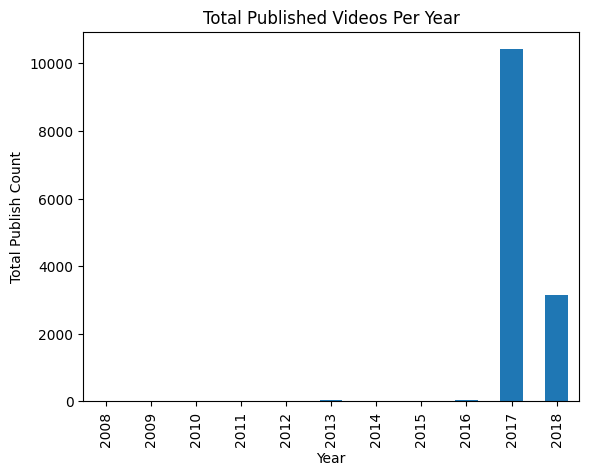

In [12]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['year'] = df['publish_time'].dt.year
yearly_counts = df.groupby('year')['video_id'].count()
yearly_counts.plot(kind='bar', xlabel='Year', ylabel='Total Publish Count', title='Total Published Videos Per Year')
plt.show()


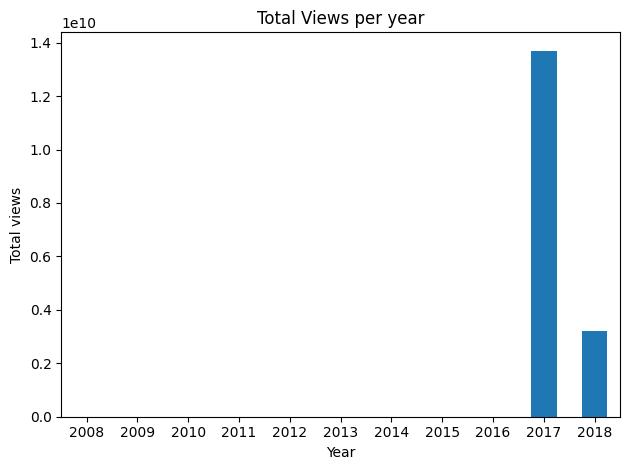

In [14]:
yearly_views = df.groupby('year')['views'].sum()
yearly_views.plot(kind='bar', xlabel='Year', ylabel='Total views', title='Total Views per year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


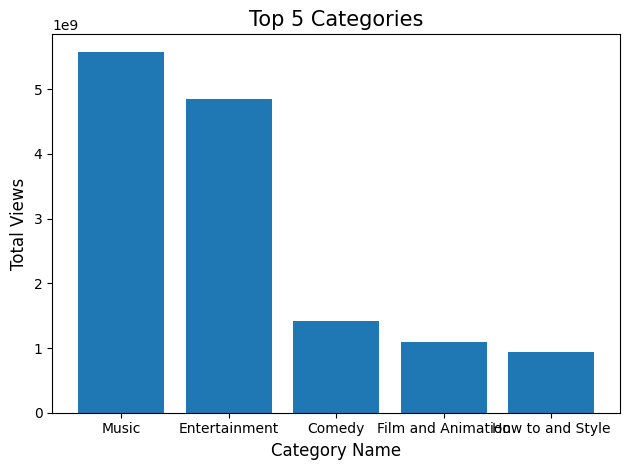

In [15]:
# Group the data by 'category_name' and calculate the sum of 'views' in each category
category_views = df.groupby('category_name')['views'].sum().reset_index()

# Sort the categories by views in descending order
top_categories = category_views.sort_values(by='views', ascending=False).head(5)

# Create a bar plot to visualize the top 5 categories
plt.bar(top_categories['category_name'], top_categories['views'])
plt.xlabel('Category Name', fontsize=12)
plt.ylabel('Total Views', fontsize=12)
plt.title('Top 5 Categories', fontsize=15)
plt.tight_layout()

plt.show()

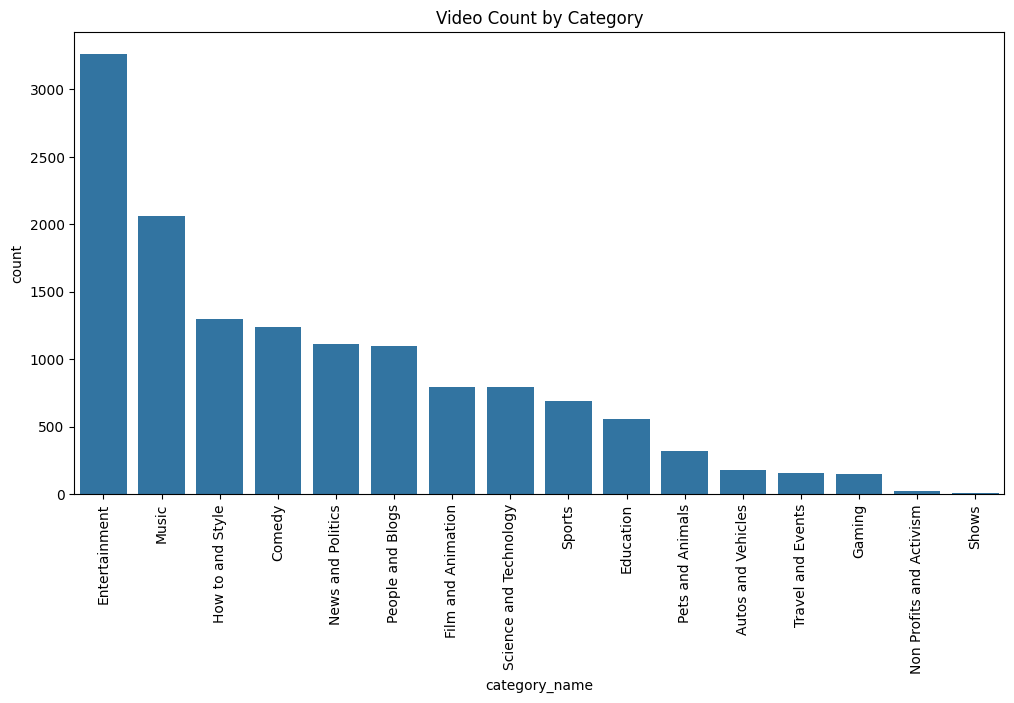

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category_name', data=df, order=df['category_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Video Count by Category')
plt.show()

<ipython-input-24-1b2054de51d9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=videos_per_hour.index, y=videos_per_hour.values, palette='pastel')


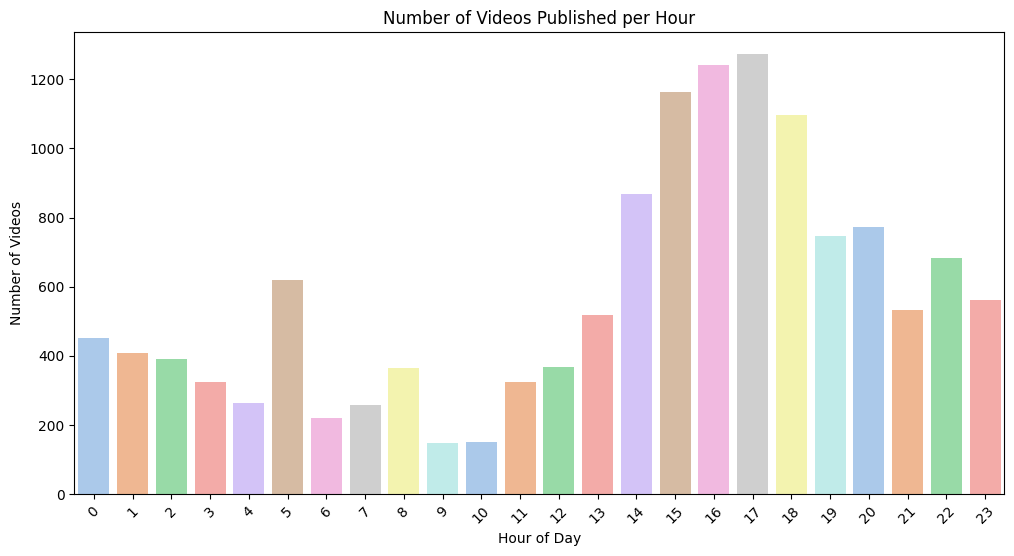

In [24]:
import seaborn as sns

# Extract the hour from the 'publish_time' column
df['publish_hour'] = df['publish_time'].dt.hour

# Count the number of videos published per hour
videos_per_hour = df['publish_hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=videos_per_hour.index, y=videos_per_hour.values, palette='pastel')
plt.title('Number of Videos Published per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()


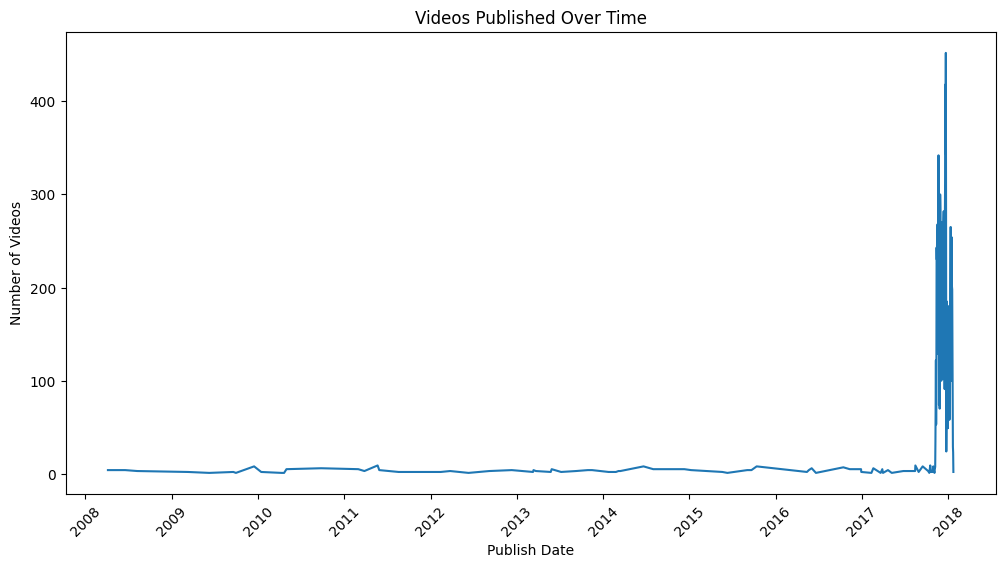

In [18]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_date'] = df['publish_time'].dt.date
video_count_by_date = df.groupby('publish_date').size()
plt.figure(figsize=(12,6))
sns.lineplot(data=video_count_by_date)
plt.title("Videos Published Over Time")
plt.xlabel('Publish Date')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Likes')

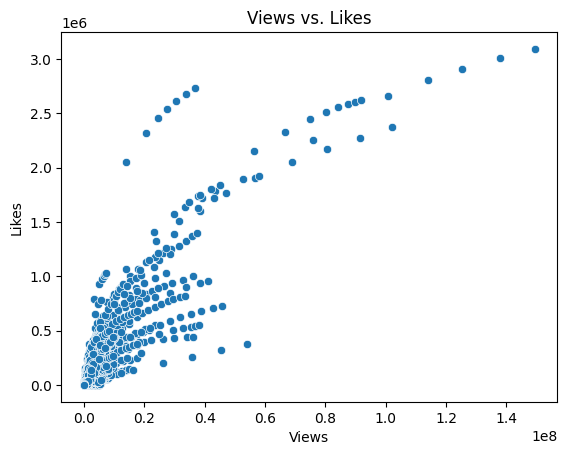

In [19]:
sns.scatterplot(data=df, x='views', y='likes')
plt.title('Views vs. Likes')
plt.xlabel('Views')
plt.ylabel('Likes')

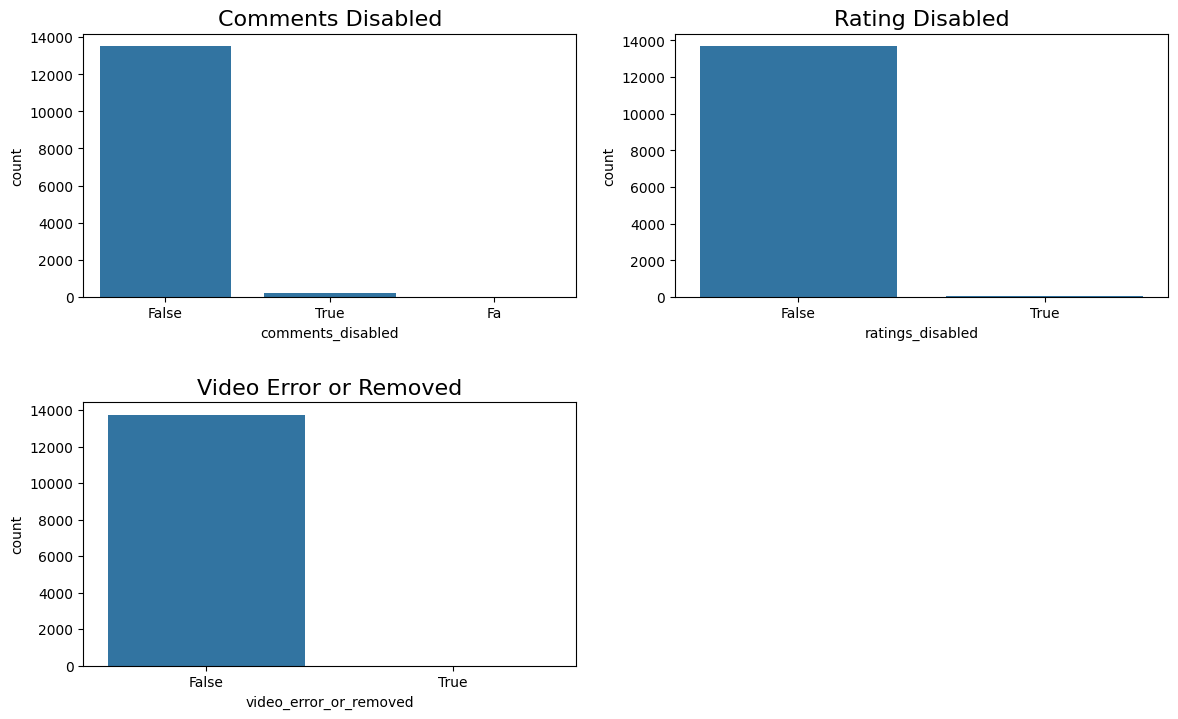

In [20]:
plt.figure(figsize=(14, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.4, top=0.9)

plt.subplot(2, 2, 1)
g = sns.countplot(x='comments_disabled', data=df)
g.set_title("Comments Disabled", fontsize=16)

plt.subplot(2, 2, 2)
g1 = sns.countplot(x='ratings_disabled', data=df)
g1.set_title("Rating Disabled", fontsize=16)

plt.subplot(2, 2, 3)
g2 = sns.countplot(x='video_error_or_removed', data=df)
g2.set_title("Video Error or Removed", fontsize=16)

plt.show()

In [21]:
corr_matrix= df['views'].corr(df['likes'])
print(corr_matrix)

0.8830616873914108
